# Evaluación Final Módulo 3

In [169]:
# Librerias
import pandas as pd
import numpy as np

# Imputación de nulos usando métodos avanzados estadísticos
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Visualización
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

# Evaluación normalidad
import scipy.stats as stats
from scipy.stats import shapiro
from scipy import stats

# Configuración
pd.set_option('display.max_columns', None)


# Gestión de los warnings
import warnings
warnings.filterwarnings("ignore")




## FASE 1. Exploración y limpieza

**Lecturas de CSV**

In [2]:
#Lectura del csv Customer Flight Activity
df_flight = pd.read_csv("Customer Flight Activity.csv")
df_flight.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [3]:
#Lectura del csv Customer Loyalty History
df_loyalty = pd.read_csv("Customer Loyalty History.csv")
df_loyalty.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


**Formas de los Dataframes**

In [4]:
# Forma de df_flight

print(f"El número de filas de df_flight es {df_flight.shape[0]}, y el número de columnas es {df_flight.shape[1]}")

El número de filas de df_flight es 405624, y el número de columnas es 10


In [5]:
# Forma de df_loyalty

print(f"El número de filas de df_loyalty es {df_loyalty.shape[0]}, y el número de columnas es {df_loyalty.shape[1]}")

El número de filas de df_loyalty es 16737, y el número de columnas es 16


**Columnas**

In [6]:
# Nombre de las columnas que tenemos en df_flight

df_flight.columns

Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed'],
      dtype='object')

In [7]:
# Nombre de las columnas que tenemos en df_loyalty

df_loyalty.columns

Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month'],
      dtype='object')

**Información de las columnas**

In [8]:
# Exploramos la información de las columnas de df_flight

df_flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


In [9]:
# Exploramos la información de las columnas de df_loyalty

df_loyalty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

**Estadisticas de las columnas numéricas**

In [10]:
# Estadísticas de las columnas numéricas de df_flight, en este caso, como hemos visto con info, todas las columnas son numéricas

df_flight.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.0,326961.00,550834.0,772194.00,999986.0
Year,405624.0,2017.500000,0.500001,2017.0,2017.00,2017.5,2018.00,2018.0
Month,405624.0,6.500000,3.452057,1.0,3.75,6.5,9.25,12.0
Flights Booked,405624.0,4.115052,5.225518,0.0,0.00,1.0,8.00,21.0
Flights with Companions,405624.0,1.031805,2.076869,0.0,0.00,0.0,1.00,11.0
Total Flights,405624.0,5.146858,6.521227,0.0,0.00,1.0,10.00,32.0
Distance,405624.0,1208.880059,1433.155320,0.0,0.00,488.0,2336.00,6293.0
Points Accumulated,405624.0,123.692721,146.599831,0.0,0.00,50.0,239.00,676.5
Points Redeemed,405624.0,30.696872,125.486049,0.0,0.00,0.0,0.00,876.0
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.0,0.00,0.0,0.00,71.0


In [11]:

# Estadísticas de las columnas numéricas de df_loyalty

df_loyalty.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,16737.0,549735.880445,258912.132453,100018.00,326603.00,550434.00,772019.00,999986.00
Salary,12499.0,79245.609409,35008.297285,-58486.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.0,6.669116,3.398958,1.00,4.00,7.00,10.00,12.00
Cancellation Year,2067.0,2016.503145,1.380743,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,2067.0,6.962748,3.455297,1.00,4.00,7.00,10.00,12.00


**Estadisticas de las columnas numéricas**

In [12]:
# Estadísticas de las columnas categóricas de df_loyalty

df_loyalty.describe(include = "object").T

,count,unique,top,freq
Country,16737,1,Canada,16737
Province,16737,11,Ontario,5404
City,16737,29,Toronto,3351
Postal Code,16737,55,V6E 3D9,911
Gender,16737,2,Female,8410
Education,16737,5,Bachelor,10475
Marital Status,16737,3,Married,9735
Loyalty Card,16737,3,Star,7637
Enrollment Type,16737,2,Standard,15766


**Estudio de las columnas categóricas**

In [13]:
# creamos un dataframe con las columnas categoricas de df_loyalty
df_loyalty_cat = df_loyalty.select_dtypes(include = "object")
df_loyalty_cat.head()

,Country,Province,City,Postal Code,Gender,Education,Marital Status,Loyalty Card,Enrollment Type
0,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,Married,Star,Standard
1,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,Divorced,Star,Standard
2,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,Single,Star,Standard
3,Canada,Ontario,Toronto,P1W 1K4,Male,College,Single,Star,Standard
4,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,Married,Star,Standard


In [14]:
# creamos una variable con los nombres de las columnas del DataFrame de las variables categóricas del df_loyalty
columnas_categoricas = df_loyalty_cat.columns
print(f"Las columnas del DataFrame de variables categóricas son {columnas_categoricas}")

# Iteramos por las columnas categoricas de df_loyalty para sacar sus valores únicos y sus frecuencias
for columna in columnas_categoricas:
    print(f" \n----------- ESTAMOS ANALIZANDO LA COLUMNA: '{columna.upper()}' -----------\n")
    print(f"Sus valores únicos son: {df_loyalty_cat[columna].unique()}\n")
    print(f"Las frecuencias de los valores únicos de las categorías son: {df_loyalty_cat[columna].value_counts()} ")

Las columnas del DataFrame de variables categóricas son Index(['Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education',
       'Marital Status', 'Loyalty Card', 'Enrollment Type'],
      dtype='object')
 
----------- ESTAMOS ANALIZANDO LA COLUMNA: 'COUNTRY' -----------

Sus valores únicos son: ['Canada']

Las frecuencias de los valores únicos de las categorías son: Canada    16737
Name: Country, dtype: int64 
 
----------- ESTAMOS ANALIZANDO LA COLUMNA: 'PROVINCE' -----------

Sus valores únicos son: ['Ontario' 'Alberta' 'British Columbia' 'Quebec' 'Yukon' 'New Brunswick'
 'Manitoba' 'Nova Scotia' 'Saskatchewan' 'Newfoundland'
 'Prince Edward Island']

Las frecuencias de los valores únicos de las categorías son: Ontario                 5404
British Columbia        4409
Quebec                  3300
Alberta                  969
Manitoba                 658
New Brunswick            636
Nova Scotia              518
Saskatchewan             409
Newfoundland             258
Yukon

**Valores nulos**

In [15]:
# Estudiamos los valores nulos en df_flight
print("En df_flight el porcentaje de valores nulos es:")
print((df_flight.isnull().sum() / len(df_flight)) * 100)

En df_flight el porcentaje de valores nulos es:
Loyalty Number                 0.0
Year                           0.0
Month                          0.0
Flights Booked                 0.0
Flights with Companions        0.0
Total Flights                  0.0
Distance                       0.0
Points Accumulated             0.0
Points Redeemed                0.0
Dollar Cost Points Redeemed    0.0
dtype: float64


In [16]:
# Estudiamos los valores nulos en df_loyalty
print("En df_loyalty el porcentaje de valores nulos es:")
print((df_loyalty.isnull().sum() / len(df_loyalty)) * 100)

En df_loyalty el porcentaje de valores nulos es:
Loyalty Number         0.000000
Country                0.000000
Province               0.000000
City                   0.000000
Postal Code            0.000000
Gender                 0.000000
Education              0.000000
Salary                25.321145
Marital Status         0.000000
Loyalty Card           0.000000
CLV                    0.000000
Enrollment Type        0.000000
Enrollment Year        0.000000
Enrollment Month       0.000000
Cancellation Year     87.650117
Cancellation Month    87.650117
dtype: float64


In [17]:
# decido hacer el tratamiento de los nulos después del mergeado para que no afecte a la integridad de los datos.

**Filas duplicadas**

In [18]:
# Filas duplicadas en df_flight
duplicates_flight = df_flight[df_flight.duplicated()]

# Número de filas duplicadas
number_duplicates_flight = len(duplicates_flight)

print(f"El total de filas duplicadas en df_flight: {number_duplicates_flight}")
# Mostrar las filas duplicadas
print("\nFilas duplicadas en df_flight:")

duplicates_flight

El total de filas duplicadas en df_flight: 1864

Filas duplicadas en df_flight:


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
42,101902,2017,1,0,0,0,0,0.0,0,0
227,112142,2017,1,0,0,0,0,0.0,0,0
478,126100,2017,1,0,0,0,0,0.0,0,0
567,130331,2017,1,0,0,0,0,0.0,0,0
660,135421,2017,1,0,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
404668,949628,2018,12,0,0,0,0,0.0,0,0
404884,960050,2018,12,0,0,0,0,0.0,0,0
405111,971370,2018,12,0,0,0,0,0.0,0,0
405410,988392,2018,12,0,0,0,0,0.0,0,0


In [19]:
# Tratamiento de los duplicados
# Se utiliza drop para eliminar los duplicados, para que los cambios permanezcan en df_flight uso inplace = True

df_flight.drop_duplicates(inplace=True)



In [20]:
# Resetear el índice del dataframe después de eliminar duplicados, hago esto para que los índices no queden desordenados
df_flight.reset_index(drop=True)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
403755,999902,2018,12,0,0,0,0,0.0,0,0
403756,999911,2018,12,0,0,0,0,0.0,0,0
403757,999940,2018,12,3,0,3,1233,123.0,0,0
403758,999982,2018,12,0,0,0,0,0.0,0,0


In [21]:
# Contar el número de registros duplicados despues de la limpieza basado en las colunas
numero_registros_duplicados = df_flight.duplicated().sum()

print(f"El número de duplicados en df_flight: {numero_registros_duplicados}")

El número de duplicados en df_flight: 0


In [22]:
print(f"El número de filas de df_flight después de la limpieza de duplicados es {df_flight.shape[0]}, y el número de columnas es {df_flight.shape[1]}")

El número de filas de df_flight después de la limpieza de duplicados es 403760, y el número de columnas es 10


In [23]:
df_flight.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [24]:
# Filas duplicadas en df_loyalty
duplicates_loyalty = df_loyalty[df_loyalty.duplicated()]

# Número de filas duplicadas
number_duplicates_loyalty = len(duplicates_loyalty)

print(f"El total de filas duplicadas en df_loyalty: {number_duplicates_loyalty}")

# Mostrar las filas duplicadas
print("\nFilas duplicadas en df_loyalty:")

duplicates_loyalty

El total de filas duplicadas en df_loyalty: 0

Filas duplicadas en df_loyalty:


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month


**Unión de dataframes**

In [25]:
# Unión de ficheros usando un "right" ya que de esta forma aseguramos toda la información del fichero de los vuelos ya que un mismo cliente puede realizar varios vuelos.
# Mantiene todas las filas del DataFrame derecho (df_flight) y añade las filas del DataFrame izquierdo (df_loyalty) donde hay coincidencias. Si no hay coincidencias, se llenan con NaN.

df_merged = pd.merge(df_loyalty, df_flight, on='Loyalty Number', how='right')

In [26]:
df_merged.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN,2017,1,3,0,3,1521,152.0,0,0
1,100102,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN,2017,1,10,4,14,2030,203.0,0,0
2,100140,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN,2017,1,6,0,6,1200,120.0,0,0
3,100214,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN,2017,1,0,0,0,0,0.0,0,0
4,100272,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN,2017,1,0,0,0,0,0.0,0,0


**Forma del dataframe**

In [27]:
print(f"El número de filas de df_merged después de la unión de los dos dataframes es {df_merged.shape[0]}, y el número de columnas es {df_merged.shape[1]}")

El número de filas de df_merged después de la unión de los dos dataframes es 403760, y el número de columnas es 25


**Columnas**

In [28]:
# Columnas del dataframe único
df_merged.columns

Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month', 'Year', 'Month',
       'Flights Booked', 'Flights with Companions', 'Total Flights',
       'Distance', 'Points Accumulated', 'Points Redeemed',
       'Dollar Cost Points Redeemed'],
      dtype='object')

**Información de las columnas del dataframe**

In [29]:
# Información del dataframe único
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403760 entries, 0 to 403759
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               403760 non-null  int64  
 1   Country                      403760 non-null  object 
 2   Province                     403760 non-null  object 
 3   City                         403760 non-null  object 
 4   Postal Code                  403760 non-null  object 
 5   Gender                       403760 non-null  object 
 6   Education                    403760 non-null  object 
 7   Salary                       301500 non-null  float64
 8   Marital Status               403760 non-null  object 
 9   Loyalty Card                 403760 non-null  object 
 10  CLV                          403760 non-null  float64
 11  Enrollment Type              403760 non-null  object 
 12  Enrollment Year              403760 non-null  int64  
 13 

**Estadisticas de las columnas numéricas**

In [30]:
# Estadisticos de las columnas numéricas del dataframe único
df_merged.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,403760.0,549875.383713,258961.514684,100018.00,326699.00,550598.00,772152.00,999986.00
Salary,301500.0,79258.576285,34983.929798,-58486.00,59262.00,73479.00,88606.00,407228.00
CLV,403760.0,7990.864857,6863.317160,1898.01,3981.78,5776.34,8937.12,83325.38
Enrollment Year,403760.0,2015.250716,1.979427,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,403760.0,6.667555,3.398829,1.00,4.00,7.00,10.00,12.00
Cancellation Year,49650.0,2016.504350,1.380482,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,49650.0,6.962095,3.454362,1.00,4.00,7.00,10.00,12.00
Year,403760.0,2017.500352,0.500000,2017.00,2017.00,2018.00,2018.00,2018.00
Month,403760.0,6.501335,3.451982,1.00,4.00,7.00,10.00,12.00
Flights Booked,403760.0,4.134050,5.230064,0.00,0.00,1.00,8.00,21.00


**Estadísticas de las columnas categóricas**

In [31]:
#Estadisticos de las columnas categóricas del dataframe único
df_merged.describe(include = "object").T

,count,unique,top,freq
Country,403760,1,Canada,403760
Province,403760,11,Ontario,130258
City,403760,29,Toronto,80775
Postal Code,403760,55,V6E 3D9,21944
Gender,403760,2,Female,202757
Education,403760,5,Bachelor,252567
Marital Status,403760,3,Married,234845
Loyalty Card,403760,3,Star,183745
Enrollment Type,403760,2,Standard,380419


**Nulos**

In [32]:
# Estudiamos los valores nulos en el dataframe único
print("En df_merged el porcentaje de valores nulos es:")
print((df_merged.isnull().sum() / len(df_merged)) * 100)

En df_merged el porcentaje de valores nulos es:
Loyalty Number                  0.000000
Country                         0.000000
Province                        0.000000
City                            0.000000
Postal Code                     0.000000
Gender                          0.000000
Education                       0.000000
Salary                         25.326927
Marital Status                  0.000000
Loyalty Card                    0.000000
CLV                             0.000000
Enrollment Type                 0.000000
Enrollment Year                 0.000000
Enrollment Month                0.000000
Cancellation Year              87.703091
Cancellation Month             87.703091
Year                            0.000000
Month                           0.000000
Flights Booked                  0.000000
Flights with Companions         0.000000
Total Flights                   0.000000
Distance                        0.000000
Points Accumulated              0.000000
Points Re

In [33]:
# Creamos un dataframe solo con las columnas que contengan nulos

porcentaje_nulos = (df_merged.isnull().sum() / df_merged.shape[0]) * 100

df_nulos = pd.DataFrame(porcentaje_nulos, columns = ["%_nulos"])

# filtramos el DataFrame para quedarnos solo con aquellas columnas que tengan nulos
df_nulos[df_nulos["%_nulos"] > 0]

,%_nulos
Salary,25.326927
Cancellation Year,87.703091
Cancellation Month,87.703091


In [34]:
# Obtenemos la lista de columnas numericas que tienen nulos
nulos_numericos = df_merged[df_merged.columns[df_merged.isnull().any()]].select_dtypes(include = np.number).columns
print("Las columnas numéricas que tienen nulos son : \n ")
print(nulos_numericos)

Las columnas numéricas que tienen nulos son : 
 
Index(['Salary', 'Cancellation Year', 'Cancellation Month'], dtype='object')


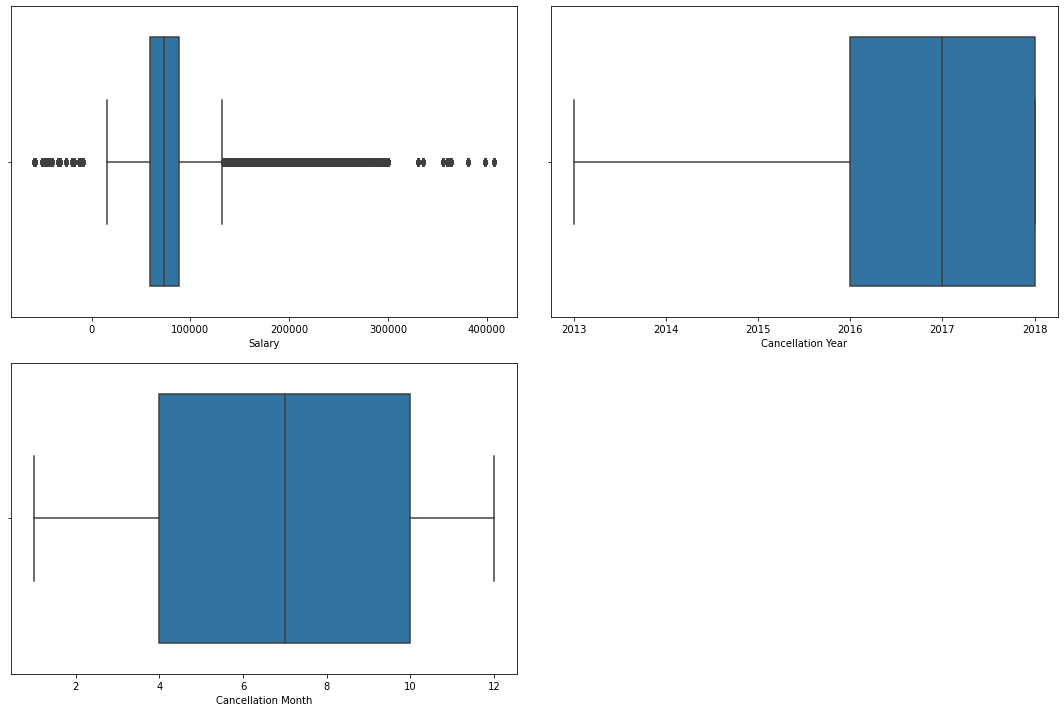

In [35]:
# vemos si dentro de las columnas donde tenemos nulos tenemos valores atípicos. 


fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15,10)) 

axes = axes.flat

for indice, col in enumerate(nulos_numericos):
    sns.boxplot(x = col, data = df_merged, ax = axes[indice])
    
plt.tight_layout()
fig.delaxes(axes[-1]);

In [36]:
# Las columnas Cancellation Year y Cancellation Month tienen más de un 87% de nulos, además no las necesitamos para nuestro analisis, por lo que las elimino.

df_merged.drop("Cancellation Year", axis = 1, inplace = True)

In [37]:
df_merged.drop("Cancellation Month", axis = 1, inplace = True)

In [38]:
df_merged.columns

Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month', 'Year',
       'Month', 'Flights Booked', 'Flights with Companions', 'Total Flights',
       'Distance', 'Points Accumulated', 'Points Redeemed',
       'Dollar Cost Points Redeemed'],
      dtype='object')

In [39]:
# Sacamos las columnas numéricas para ver si hay valores negativos en ellas, ya que en el gráfico anterior podemos detectar que en Salary si los hay

col_num_df = df_merged.select_dtypes(include=["number"])
columnas_negativas = []
for col in col_num_df.columns:
    if(col_num_df[col] < 0).any():
        columnas_negativas.append(col)

columnas_negativas

['Salary']

In [40]:
# Valores negativos en Salary
negative_count = (df_merged['Salary'] < 0).sum()
print(f"Número de valores negativos en Salary: {negative_count}")

Número de valores negativos en Salary: 480


In [42]:
# Cambiamos a absolutos los valores negativos

df_merged['Salary'] = df_merged['Salary'].abs() 

In [43]:
#Comprobamos haber pasado todos los valores negativos de Salary a absolutos
negative_count = (df_merged['Salary'] < 0).sum()
print(f"Número de valores negativos en Salary: {negative_count}")

Número de valores negativos en Salary: 0


In [44]:
#  Para los nulos de Salary usaré la mediana, ya que es más útil si los datos están sesgados

df_merged['Salary'].fillna(df_merged['Salary'].median(), inplace=True)

In [45]:
print("En df_merged despues de tratar los nulos este es el resultado:")
print((df_merged.isnull().sum() / len(df_merged)) * 100)

En df_merged despues de tratar los nulos este es el resultado:
Loyalty Number                 0.0
Country                        0.0
Province                       0.0
City                           0.0
Postal Code                    0.0
Gender                         0.0
Education                      0.0
Salary                         0.0
Marital Status                 0.0
Loyalty Card                   0.0
CLV                            0.0
Enrollment Type                0.0
Enrollment Year                0.0
Enrollment Month               0.0
Year                           0.0
Month                          0.0
Flights Booked                 0.0
Flights with Companions        0.0
Total Flights                  0.0
Distance                       0.0
Points Accumulated             0.0
Points Redeemed                0.0
Dollar Cost Points Redeemed    0.0
dtype: float64


**Estudio de las columnas categóricas**

In [46]:
# Filtrar las columnas categóricas

categoricas_columnas = df_merged.select_dtypes(include='object').columns 
categoricas_columnas

Index(['Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education',
       'Marital Status', 'Loyalty Card', 'Enrollment Type'],
      dtype='object')

In [47]:
# Vamos a analizar los valores de las columnas categóricas para ver posibles valores anomalos, vacios o outliers.

for col in categoricas_columnas:
    print(f"Valores únicos y recuento de frecuencias para la columna '{col.upper()}':")
    print(df_merged[col].value_counts()) 
    print("------------------------------------------------------------------")

Valores únicos y recuento de frecuencias para la columna 'COUNTRY':
Canada    403760
Name: Country, dtype: int64
------------------------------------------------------------------
Valores únicos y recuento de frecuencias para la columna 'PROVINCE':
Ontario                 130258
British Columbia        106442
Quebec                   79573
Alberta                  23360
Manitoba                 15900
New Brunswick            15352
Nova Scotia              12507
Saskatchewan              9861
Newfoundland              6244
Yukon                     2679
Prince Edward Island      1584
Name: Province, dtype: int64
------------------------------------------------------------------
Valores únicos y recuento de frecuencias para la columna 'CITY':
Toronto           80775
Vancouver         62314
Montreal          49687
Winnipeg          15900
Whistler          13994
Halifax           12507
Ottawa            12262
Edmonton          11768
Trenton           11710
Quebec City       11698
Dawson Cr

**Estudio de las columnas numéricas**

In [48]:
# Filtrar las columnas numéricas
numericas_columnas = df_merged.select_dtypes(include=['number']).columns
numericas_columnas

Index(['Loyalty Number', 'Salary', 'CLV', 'Enrollment Year',
       'Enrollment Month', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed'],
      dtype='object')

In [49]:
# Vamos a analizar los valores de las columnas numéricas para ver posibles valores anomalos, vacios o outliers.

for col in numericas_columnas:
    print(f"Valores únicos y recuento de frecuencias para la columna '{col.upper()}':")
    print(df_merged[col].value_counts()) 
    print("------------------------------------------------------------------")

Valores únicos y recuento de frecuencias para la columna 'LOYALTY NUMBER':
974875    48
736504    48
890702    48
617489    48
200519    47
          ..
428402    24
428452    24
428520    24
428523    24
999891    24
Name: Loyalty Number, Length: 16737, dtype: int64
------------------------------------------------------------------
Valores únicos y recuento de frecuencias para la columna 'SALARY':
73479.0     102308
101933.0       552
61809.0        336
51573.0        336
62283.0        336
             ...  
22425.0         24
58153.0         24
57156.0         24
40991.0         24
56345.0         24
Name: Salary, Length: 5890, dtype: int64
------------------------------------------------------------------
Valores únicos y recuento de frecuencias para la columna 'CLV':
8564.77     312
14024.36    311
4330.39     309
3873.65     308
25464.82    305
           ... 
2511.94      24
3657.59      24
6656.20      24
5052.38      24
8409.07      24
Name: CLV, Length: 7984, dtype: int64
---

In [50]:
# La columna Country tiene el mismo valor en todas sus filas por lo que vamos a eliminarla, además no la necesitamos para nuestro analisis posterior

df_merged.drop("Country", axis = 1, inplace = True)

In [51]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403760 entries, 0 to 403759
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               403760 non-null  int64  
 1   Province                     403760 non-null  object 
 2   City                         403760 non-null  object 
 3   Postal Code                  403760 non-null  object 
 4   Gender                       403760 non-null  object 
 5   Education                    403760 non-null  object 
 6   Salary                       403760 non-null  float64
 7   Marital Status               403760 non-null  object 
 8   Loyalty Card                 403760 non-null  object 
 9   CLV                          403760 non-null  float64
 10  Enrollment Type              403760 non-null  object 
 11  Enrollment Year              403760 non-null  int64  
 12  Enrollment Month             403760 non-null  int64  
 13 

**Estandarización de columnas y filas**

In [52]:
# Antes de continuar voy a estandarizar los nombres de las columnas y el contenido de las filas para evitar errores futuros

In [53]:
df_merged.columns = df_merged.columns.str.replace(' ', '_').str.lower()

In [57]:
# Como hemos eliminado alguna columna, creamos una nueva variable para las columnas categóricas para despues poder pasar toda la información a minúsculas
columnas_cat = df_merged.select_dtypes(include='object').columns 
columnas_cat

Index(['province', 'city', 'postal_code', 'gender', 'education',
       'marital_status', 'loyalty_card', 'enrollment_type'],
      dtype='object')

In [58]:
# Cambio del contenido de las columnas categóricas a minúsculas para estandarizar

for col in columnas_cat:
    df_merged[col] = df_merged[col].str.lower()

In [59]:
df_merged.head()

,loyalty_number,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
0,100018,alberta,edmonton,t9g 1w3,female,bachelor,92552.0,married,aurora,7919.20,standard,2016,8,2017,1,3,0,3,1521,152.0,0,0
1,100102,ontario,toronto,m1r 4k3,male,college,73479.0,single,nova,2887.74,standard,2013,3,2017,1,10,4,14,2030,203.0,0,0
2,100140,british columbia,dawson creek,u5i 4f1,female,college,73479.0,divorced,nova,2838.07,standard,2016,7,2017,1,6,0,6,1200,120.0,0,0
3,100214,british columbia,vancouver,v5r 1w3,male,bachelor,63253.0,married,star,4170.57,standard,2015,8,2017,1,0,0,0,0,0.0,0,0
4,100272,ontario,toronto,p1l 8x8,female,bachelor,91163.0,divorced,star,6622.05,standard,2014,1,2017,1,0,0,0,0,0.0,0,0


**Cambios de tipos de datos**

In [60]:
# Cambio los meses a sus nombres para que sea más sencilla su lectura

month_names = {
    1: 'january', 
    2: 'february', 
    3: 'march', 
    4: 'april', 
    5: 'may', 
    6: 'june', 
    7: 'july', 
    8: 'august', 
    9: 'september', 
    10: 'october', 
    11: 'november', 
    12: 'december'
}

In [62]:
columns_month = ['enrollment_month',  'month']

# Uso map para aplicar el diccionario de meses a cada columna
for col in columns_month:
    df_merged[col] = df_merged[col].map(month_names) 

In [63]:
df_merged.head()

,loyalty_number,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
0,100018,alberta,edmonton,t9g 1w3,female,bachelor,92552.0,married,aurora,7919.20,standard,2016,august,2017,january,3,0,3,1521,152.0,0,0
1,100102,ontario,toronto,m1r 4k3,male,college,73479.0,single,nova,2887.74,standard,2013,march,2017,january,10,4,14,2030,203.0,0,0
2,100140,british columbia,dawson creek,u5i 4f1,female,college,73479.0,divorced,nova,2838.07,standard,2016,july,2017,january,6,0,6,1200,120.0,0,0
3,100214,british columbia,vancouver,v5r 1w3,male,bachelor,63253.0,married,star,4170.57,standard,2015,august,2017,january,0,0,0,0,0.0,0,0
4,100272,ontario,toronto,p1l 8x8,female,bachelor,91163.0,divorced,star,6622.05,standard,2014,january,2017,january,0,0,0,0,0.0,0,0


In [64]:
# Por la información que dan las columnas dollar_cost_points_redeemed y distance, decido cambiarlas a float(ahora son int)
columns_float = ['dollar_cost_points_redeemed', 'distance']

def convert_columns_to_float(df, columns):
    for col in columns:
        df[col] = df[col].astype(float)
    return df

In [65]:
convert_columns_to_float(df_merged, columns_float)

,loyalty_number,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
0,100018,alberta,edmonton,t9g 1w3,female,bachelor,92552.0,married,aurora,7919.20,standard,2016,august,2017,january,3,0,3,1521.0,152.0,0,0.0
1,100102,ontario,toronto,m1r 4k3,male,college,73479.0,single,nova,2887.74,standard,2013,march,2017,january,10,4,14,2030.0,203.0,0,0.0
2,100140,british columbia,dawson creek,u5i 4f1,female,college,73479.0,divorced,nova,2838.07,standard,2016,july,2017,january,6,0,6,1200.0,120.0,0,0.0
3,100214,british columbia,vancouver,v5r 1w3,male,bachelor,63253.0,married,star,4170.57,standard,2015,august,2017,january,0,0,0,0.0,0.0,0,0.0
4,100272,ontario,toronto,p1l 8x8,female,bachelor,91163.0,divorced,star,6622.05,standard,2014,january,2017,january,0,0,0,0.0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403755,999902,ontario,toronto,m1r 4k3,male,college,73479.0,married,aurora,7290.07,standard,2014,may,2018,december,0,0,0,0.0,0.0,0,0.0
403756,999911,newfoundland,st. john's,a1c 6h9,male,doctor,217943.0,single,nova,8564.77,standard,2012,august,2018,december,0,0,0,0.0,0.0,0,0.0
403757,999940,quebec,quebec city,g1b 3l5,female,bachelor,47670.0,married,nova,20266.50,standard,2017,july,2018,december,3,0,3,1233.0,123.0,0,0.0
403758,999982,british columbia,victoria,v10 6t5,male,college,73479.0,married,star,2631.56,standard,2018,july,2018,december,0,0,0,0.0,0.0,0,0.0


In [68]:
# Redondeo las columnas tipo float a dos decimales, para ello creo una función

def round_float_columns(df):
    
    # Identificar las columnas que son de tipo float
    columns_type_float = df.select_dtypes(include=['float64']).columns
    
    # Redondear los valores de estas columnas a dos decimales
    df[columns_type_float] = df[columns_type_float].round(2)
    
    return df

In [69]:
round_float_columns(df_merged)

,loyalty_number,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
0,100018,alberta,edmonton,t9g 1w3,female,bachelor,92552.0,married,aurora,7919.20,standard,2016,august,2017,january,3,0,3,1521.0,152.0,0,0.0
1,100102,ontario,toronto,m1r 4k3,male,college,73479.0,single,nova,2887.74,standard,2013,march,2017,january,10,4,14,2030.0,203.0,0,0.0
2,100140,british columbia,dawson creek,u5i 4f1,female,college,73479.0,divorced,nova,2838.07,standard,2016,july,2017,january,6,0,6,1200.0,120.0,0,0.0
3,100214,british columbia,vancouver,v5r 1w3,male,bachelor,63253.0,married,star,4170.57,standard,2015,august,2017,january,0,0,0,0.0,0.0,0,0.0
4,100272,ontario,toronto,p1l 8x8,female,bachelor,91163.0,divorced,star,6622.05,standard,2014,january,2017,january,0,0,0,0.0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403755,999902,ontario,toronto,m1r 4k3,male,college,73479.0,married,aurora,7290.07,standard,2014,may,2018,december,0,0,0,0.0,0.0,0,0.0
403756,999911,newfoundland,st. john's,a1c 6h9,male,doctor,217943.0,single,nova,8564.77,standard,2012,august,2018,december,0,0,0,0.0,0.0,0,0.0
403757,999940,quebec,quebec city,g1b 3l5,female,bachelor,47670.0,married,nova,20266.50,standard,2017,july,2018,december,3,0,3,1233.0,123.0,0,0.0
403758,999982,british columbia,victoria,v10 6t5,male,college,73479.0,married,star,2631.56,standard,2018,july,2018,december,0,0,0,0.0,0.0,0,0.0


In [70]:

df_merged.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 403760 entries, 0 to 403759
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loyalty_number               403760 non-null  int64  
 1   province                     403760 non-null  object 
 2   city                         403760 non-null  object 
 3   postal_code                  403760 non-null  object 
 4   gender                       403760 non-null  object 
 5   education                    403760 non-null  object 
 6   salary                       403760 non-null  float64
 7   marital_status               403760 non-null  object 
 8   loyalty_card                 403760 non-null  object 
 9   clv                          403760 non-null  float64
 10  enrollment_type              403760 non-null  object 
 11  enrollment_year              403760 non-null  int64  
 12  enrollment_month             403760 non-null  object 
 13 

**Creo un nuevo CSV con la información filtrada**

In [71]:
# Guardo el DataFrame limpio en un .csv
# Uso index = False porque el índice del DataFrame no es necesario en el archivo CSV. Incluirlo puede agregar una columna extra que no aporta valor y puede ser confusa.

df_merged.to_csv("CustomerData.csv",index=False)

## FASE 2. Visualización

In [72]:
df_clean = pd.read_csv("CustomerData.csv")

In [73]:
df_clean.head()

,loyalty_number,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
0,100018,alberta,edmonton,t9g 1w3,female,bachelor,92552.0,married,aurora,7919.20,standard,2016,august,2017,january,3,0,3,1521.0,152.0,0,0.0
1,100102,ontario,toronto,m1r 4k3,male,college,73479.0,single,nova,2887.74,standard,2013,march,2017,january,10,4,14,2030.0,203.0,0,0.0
2,100140,british columbia,dawson creek,u5i 4f1,female,college,73479.0,divorced,nova,2838.07,standard,2016,july,2017,january,6,0,6,1200.0,120.0,0,0.0
3,100214,british columbia,vancouver,v5r 1w3,male,bachelor,63253.0,married,star,4170.57,standard,2015,august,2017,january,0,0,0,0.0,0.0,0,0.0
4,100272,ontario,toronto,p1l 8x8,female,bachelor,91163.0,divorced,star,6622.05,standard,2014,january,2017,january,0,0,0,0.0,0.0,0,0.0


**1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?**

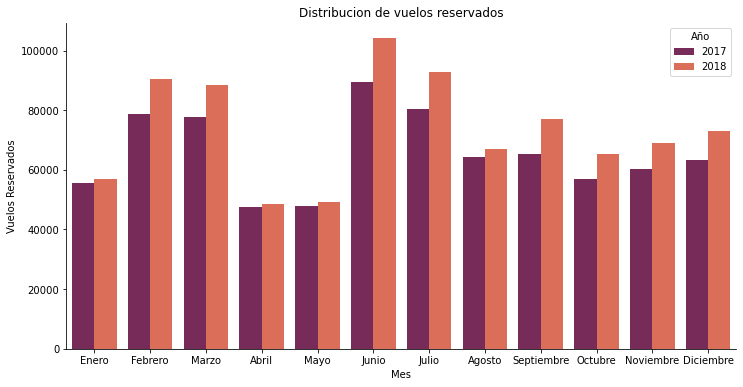

In [80]:
# Agrupo por mes y año, y sumo la cantidad de vuelos reservados
df_flights_month_year = df_clean.groupby(["year", "month"])["flights_booked"].sum().reset_index()

# Uso barplot con 'hue' para separar por año, añade una nueva dimensión a nuestra gráfica
plt.figure(figsize=(12, 6))
sns.barplot(x="month",
            y="flights_booked",
            hue="year",
            data=df_flights_month_year,
            palette="rocket")

# Titulo gráfica, nombre de ejes y etiquetas meses
plt.title("Distribucion de vuelos reservados")
plt.xlabel("Mes")
plt.ylabel("Vuelos Reservados")
plt.xticks(ticks=range(0, 12), labels=["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"])

# Leyenda
plt.legend(title="Año")

# Quito la linea de arriba y de la derecha
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)





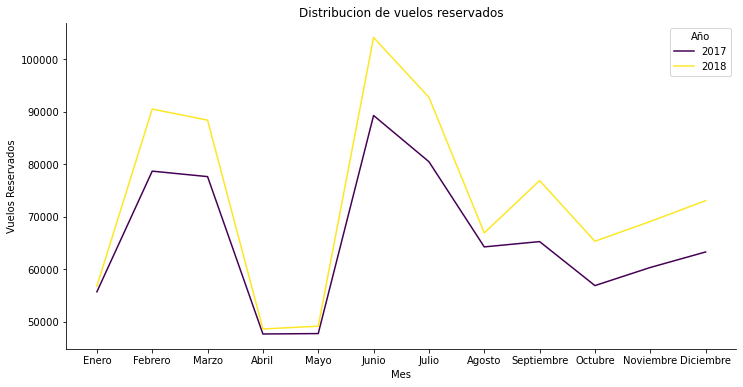

In [110]:
# Gráfico lineplot
plt.figure(figsize=(12, 6))
sns.lineplot(x="month",
             y="flights_booked",
             hue="year",
             data=df_flights_month_year,
             palette="viridis")


# Titulo gráfica, nombre de ejes y etiquetas meses
plt.title("Distribucion de vuelos reservados")
plt.xlabel("Mes")
plt.ylabel("Vuelos Reservados")
plt.xticks(ticks=range(0, 12), labels=["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"])

# Leyenda
plt.legend(title="Año")

# Quito la linea de arriba y de la derecha
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)


 ### Gráfica de Barras (Barplot):

- Descripción: Utilizamos barplot de Seaborn para visualizar la cantidad de vuelos reservados (flights_booked) en diferentes categorías de meses (month), añadiendo una dimensión extra para los años (year). Las barras rectangulares permiten una comparación clara de las cantidades en las diferentes categorías temporales.

- Justificación: Los gráficos de barras son ideales para comparar cantidades entre diferentes categorías, y la inclusión de la dimensión year permite observar variaciones interanuales.


### Gráfica de Líneas (Lineplot):

- Descripción: Se utiliza lineplot para representar series temporales, mostrando las tendencias, patrones y cambios a lo largo del tiempo de manera continua.

- Justificación: Los gráficos de líneas son frecuentemente usados con fechas porque permiten visualizar claramente las variaciones y tendencias a lo largo del tiempo.

### Observaciones:

- Meses con más reservas: Junio es el mes con mayor número de reservas, seguido de julio, lo cual coincide con la temporada de verano. Otros meses con altas reservas son febrero y marzo.

- Meses con menos reservas: Abril y mayo tienen el menor número de vuelos reservados.

- Año con más reservas: En 2018 se realizaron más reservas en todos los meses comparados con 2017. La diferencia es más pronunciada en los meses con mayor número de reservas.

**2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?**

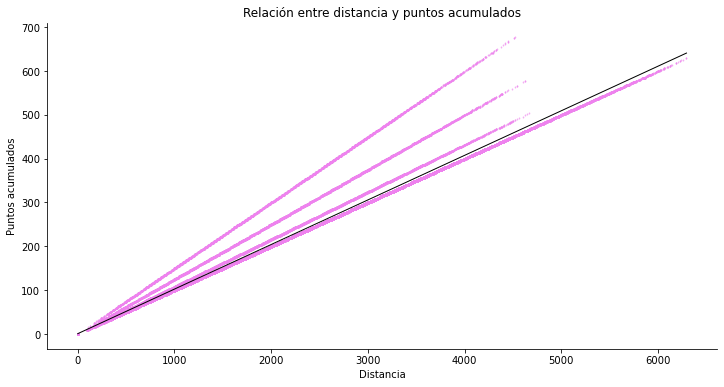

In [83]:
# Las columnas que necesitamos son distance y points_accumulated
# Gráfico de dispersion con regresion lineal
plt.figure(figsize=(12, 6))
sns.regplot(x="distance",
            y="points_accumulated",
            data=df_clean,
            marker ="d",
            line_kws = {"color": "black", "linewidth": 1},
            scatter_kws={"color": "violet", "s": 1, "alpha":0.5})

# Título gráfica, nombre ejes
plt.title("Relación entre distancia y puntos acumulados")
plt.xlabel("Distancia")
plt.ylabel("Puntos acumulados")

# Quito la linea de arriba y de la derecha
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)


### Gráfico de Regresión (Regplot):

- Descripción: Utilizamos regplot para estudiar la relación entre las variables numéricas distance y points_accumulated. Este gráfico también incluye una línea de regresión que facilita la visualización de la tendencia general entre las variables.

- Justificación: Regplot es útil para identificar relaciones lineales entre dos variables y para visualizar la dispersión de los datos junto con la tendencia central.

### Observaciones:

La línea de tendencia ascendente indica una relación positiva entre distance y points_accumulated, sugiriendo que a mayor distancia de los vuelos, se acumulan más puntos.

**3. ¿Cuál es la distribución de los clientes por provincia o estado?**

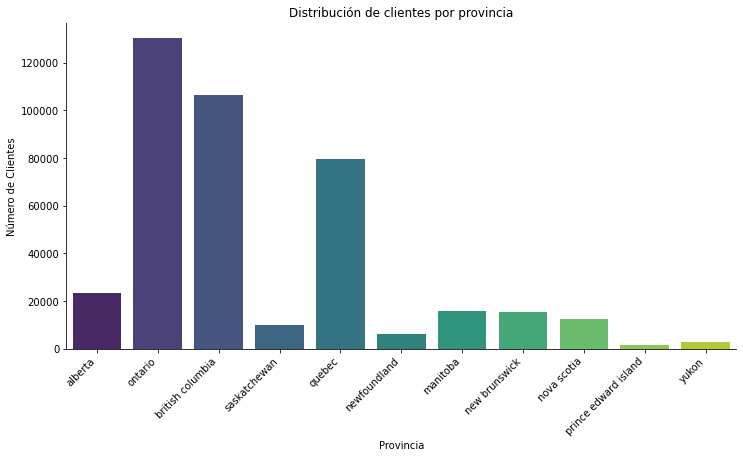

In [87]:
# Gráfico countplot
plt.figure(figsize=(12, 6))
sns.countplot(x="province",
              data=df_clean,
              palette="viridis")

# Título gráfica, nombre ejes y giro de los nombres de los ejes.
plt.title("Distribución de clientes por provincia")
plt.xlabel("Provincia")
plt.ylabel("Número de Clientes")
plt.xticks(rotation=45, ha="right")

# Quito la linea de arriba y de la derecha
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)

In [88]:
# Cuento y ordeno cada provinicia

df_province = df_clean["province"].value_counts().sort_values(ascending=False)

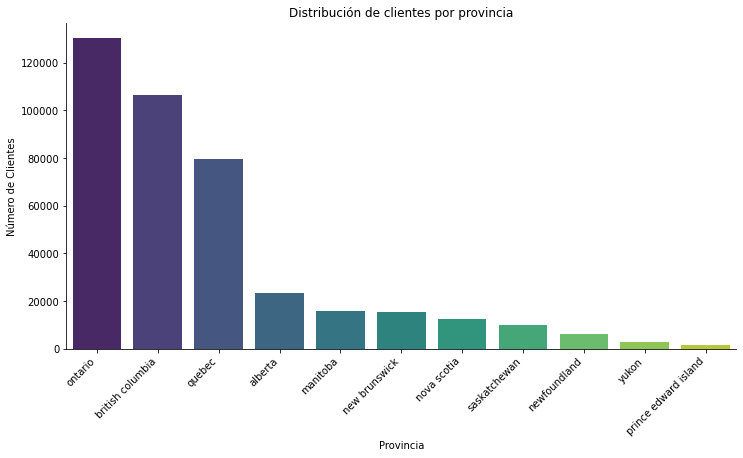

In [89]:
# Gráfico countplot
plt.figure(figsize=(12, 6))
sns.countplot(x="province",
              data=df_clean,
              order = df_province.index, #ordeno las columnas de más a menos
              palette="viridis")

# Título gráfica, nombre ejes y giro de los nombres de los ejes.
plt.title("Distribución de clientes por provincia")
plt.xlabel("Provincia")
plt.ylabel("Número de Clientes")
plt.xticks(rotation=45, ha="right")

# Quito la linea de arriba y de la derecha
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)

### Gráfico de Conteo (Countplot):

- Descripción: Utilizamos countplot para mostrar la frecuencia de clientes por provincia, facilitando la visualización de la distribución geográfica de los clientes.

- Justificación: Countplot es ideal para visualizar la distribución de datos categóricos, permitiendo comparar fácilmente las frecuencias de las distintas categorías.

### Observaciones:

Ontario, British Columbia y Quebec son las provincias con mayor número de clientes, según el gráfico.

**4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?**


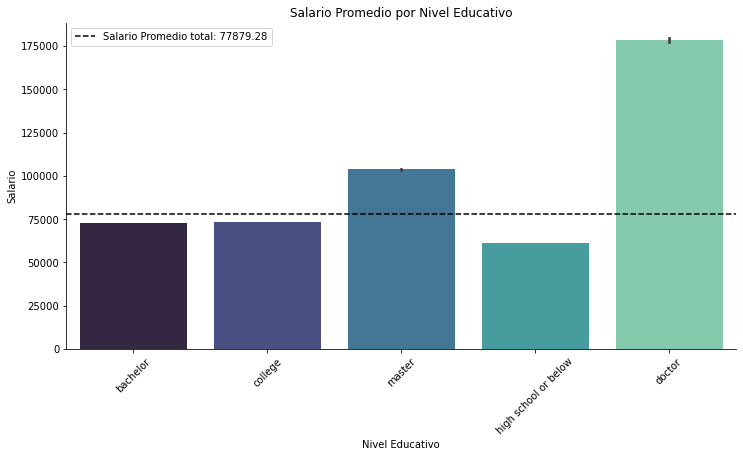

In [108]:
plt.figure(figsize=(12, 6))

# Gráfico barplot
sns.barplot(x="education",
             y="salary", 
             data=df_clean, 
             palette="mako")
             

# Para entenderlo mejor añado una línea para el salario promedio total
total_average = df_clean["salary"].mean() # Calculamos el salario promedio
plt.axhline(total_average, 
            color="black", 
            linestyle="--", 
            label=f"Salario Promedio total: {total_average:.2f}")

# Titulo y nombre ejes
plt.title("Salario Promedio por Nivel Educativo")
plt.xlabel("Nivel Educativo")
plt.ylabel("Salario")
plt.xticks(rotation=45)

# Añadir leyenda
plt.legend()

# Quito la linea de arriba y de la derecha
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)



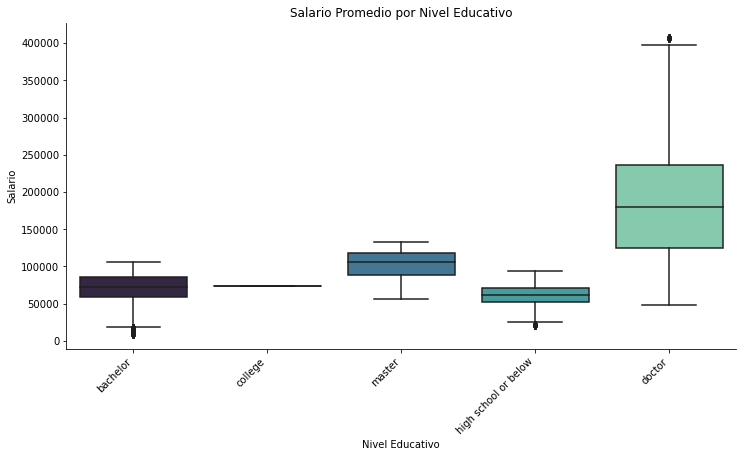

In [97]:
# Gráfico boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x="education",
            y="salary",
            data=df_clean,
            palette="mako")

# Título, nombre ejes y rotación ejes
plt.title("Salario Promedio por Nivel Educativo")
plt.xlabel("Nivel Educativo")
plt.ylabel("Salario")
plt.xticks(rotation=45, ha="right")

# Quito la linea de arriba y de la derecha
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)



### Gráficos de Caja (Boxplot) y de Barras (Barplot):

- Descripción: Utilizamos boxplot y barplot para comparar el salario promedio entre diferentes niveles educativos.

- Boxplot: Muestra la mediana, los cuartiles y los valores atípicos, proporcionando una visión detallada de la distribución del salario dentro de cada nivel educativo.

- Barplot: Muestra la media del salario según el nivel educativo, permitiendo una comparación rápida y directa de los valores medios.

- Justificación: Boxplot es útil para entender la distribución completa de los datos y detectar valores atípicos, mientras que barplot simplifica la comparación de medias entre categorías.

### Observaciones:

- Salario promedio: 77879.28

- Niveles educativos:

Doctor y Master: Tienen un salario por encima del promedio.

Bachelor y College: Tienen un salario similar y algo por debajo del promedio.

High School or below: Tienen el salario más bajo, correspondiente al nivel educativo más bajo.


**5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?**

In [100]:
# Contar el número de clientes por tipo de tarjeta de fidelidad
customers_card = df_clean["loyalty_card"].value_counts()

# Calcular la proporción de clientes por tipo de tarjeta de fidelidad
proportion_customers = customers_card / customers_card.sum()

percentage_customers = proportion_customers * 100
# Mostrar los resultados
print("Proporción de clientes por tarjeta de fidelidad:")
print(percentage_customers)

Proporción de clientes por tarjeta de fidelidad:
star      45.508470
nova      33.902071
aurora    20.589459
Name: loyalty_card, dtype: float64


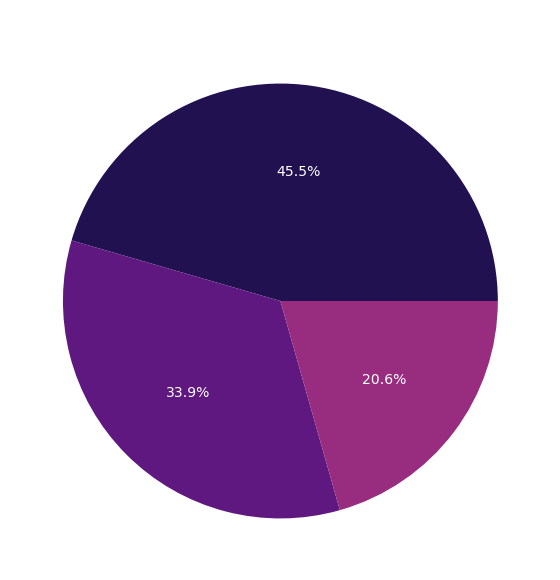

In [103]:
# Gráfica Pie
plt.figure(figsize=(10, 10))
wedges, texts, autotexts=plt.pie(percentage_customers,
        labels=percentage_customers.index,
        autopct="%1.1f%%",
        colors=sns.color_palette("magma"))

# Título gráfica
plt.title("Proporción de Clientes por Tipo de Tarjeta de Fidelidad", color='white', fontsize=20)

# Cambiar color y tamaño de las etiquetas
for text in texts:
    text.set_color("white")
    text.set_fontsize(14)

# Cambiar color y tamaño de los porcentajes
for autotext in autotexts:
    autotext.set_color("white")
    autotext.set_fontsize(14)

### Gráfico de Piechart:

- Descripción: Utilizamos piechart para visualizar la proporción de clientes con diferentes tipos de tarjetas de fidelidad.

- Justificación: Los gráficos de pie son efectivos para mostrar proporciones y porcentajes de un todo, facilitando la comparación visual de la participación de cada categoría.

### Observaciones:

- Star: 45.5%, es el tipo de tarjeta con más clientes.

- Nova: 33.9%.

- Aurora: 20.6%.

**6. ¿Cómo se distribuyen los clientes según su estado civil y género?**

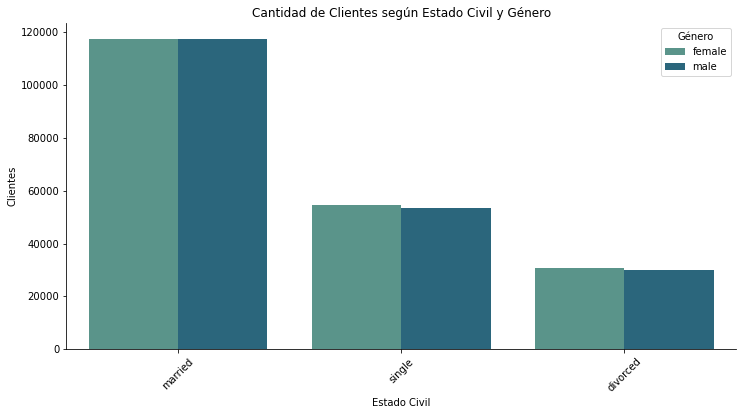

In [105]:
# Gráfico Countplot
plt.figure(figsize=(12, 6))
sns.countplot(x="marital_status", 
            hue="gender", 
            data=df_clean, 
            palette="crest")

# Títulos y etiquetas
plt.title("Cantidad de Clientes según Estado Civil y Género")
plt.xlabel("Estado Civil")
plt.ylabel("Clientes")
plt.legend(title="Género")
plt.xticks(rotation=45)

# Quito la linea de arriba y de la derecha
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)



### Gráfico de Conteo (Countplot):

- Descripción: Utilizamos countplot para comparar la distribución de clientes según su estado civil y género.

- Justificación: Countplot es útil para visualizar la frecuencia de categorías y comparar subcategorías dentro de cada grupo.

### Observaciones:

- Estado civil: La mayoría de los clientes están casados, siendo la categoría de divorciados la menos frecuente.

- Género: Al añadir la dimensión del género, se observa que no hay una diferencia significativa entre hombres y mujeres en las distintas categorías de estado civil.

## FASE 3. Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo

**Preparación de Datos**


In [111]:
# Solo necesitamos las columnas flights_bookd y education por lo que filtramos el dataframe y creamos uno con solo estas columnas

df_flights_education=df_clean[["flights_booked", "education"]] 
df_flights_education.head()

,flights_booked,education
0,3,bachelor
1,10,college
2,6,college
3,0,bachelor
4,0,bachelor


**Análisis Descriptivo**

In [115]:
# Se agrupan los datos por educación y seleccionan las reservas de vuelo para calcular las estadísticas descriptivas 
education_groupby = df_flights_education.groupby("education")["flights_booked"]

# Estadísticas descriptivas
stats = education_groupby.describe().T


print(f"Las estadisticas descriptivas son:")
stats

Las estadisticas descriptivas son:


education,bachelor,college,doctor,high school or below,master
count,252567.000000,102260.000000,17731.000000,18915.000000,12287.000000
mean,4.110288,4.169744,4.175512,4.176209,4.200700
std,5.221671,5.246040,5.256971,5.239267,5.213956
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000
75%,8.000000,8.000000,8.000000,8.000000,8.000000
max,21.000000,21.000000,21.000000,21.000000,21.000000


In [144]:
#Calculmamos la Moda por grupo educativo

education_mode = df_flights_education.groupby("education")["flights_booked"].apply(lambda x: x.mode().iloc[0])

# Convertimos el resultado en un DataFrame
df_education_mode = education_mode.reset_index()

# Renombramos las columnas para mayor claridad
df_education_mode.columns = ['education', 'mode_flights_booked']

print("Moda por grupo educativo: ")

df_education_mode

Moda por grupo educativo: 


,education,var_flights_booked
0,bachelor,0
1,college,0
2,doctor,0
3,high school or below,0
4,master,0


In [143]:
# Calculamos la varianza por grupo educativo

education_var = df_flights_education.groupby("education")["flights_booked"].apply(lambda x: x.var())

# Convertimos el resultado en un DataFrame
df_education_var = education_var.reset_index()

# Renombramos las columnas para mayor claridad
df_education_var.columns = ['education', 'var_flights_booked']

print("Varianza por grupo educativo: ")

df_education_var

Varianza por grupo educativo: 


,education,var_flights_booked
0,bachelor,27.265843
1,college,27.520938
2,doctor,27.635748
3,high school or below,27.449915
4,master,27.185339


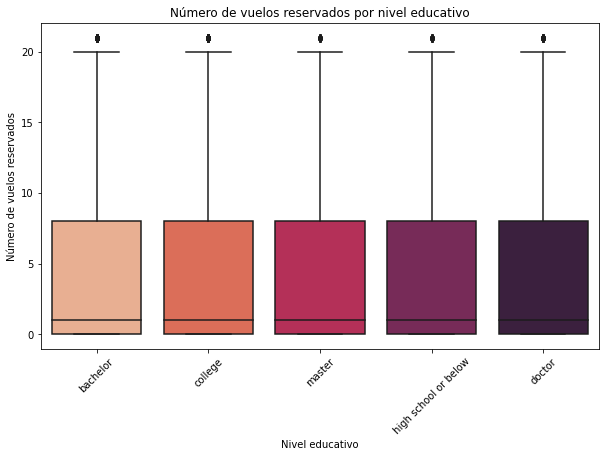

In [129]:
# Crear un boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x="education",
            y="flights_booked", 
            data=df_flights_education,
            palette="rocket_r")


# Titulo, ejes y rotación nombre ejes
plt.title("Número de vuelos reservados por nivel educativo")
plt.xlabel("Nivel educativo")
plt.ylabel("Número de vuelos reservados")
plt.xticks(rotation=45)
plt.show()

In [131]:
# Vemos por qué la moda es 0, en flight_booked hay clientes sin reservas

# Clientes con 0 vuelos reservados
customers_no_book = df_clean[df_clean['flights_booked'] == 0]

# Porcentaje de clientes unicos con 0 vuelos reservados
print(f"Porcentaje de clientes que han reservado 0 vuelos: {(customers_no_book.shape[0] / df_clean.shape[0]) * 100:.2f}%")

Porcentaje de clientes que han reservado 0 vuelos: 48.58%


In [133]:
# Al existir un porcentaje de 48.58% de clientes que no han reservado vuelos, repetimos el análisis descriptivo solo para los clientes que han reservado vuelos.

df_flights_education_book = df_clean[df_clean["flights_booked"] > 0][["flights_booked", "education"]]
df_flights_education_book

,flights_booked,education
0,3,bachelor
1,10,college
2,6,college
8,6,bachelor
10,3,bachelor
...,...,...
403748,15,doctor
403749,14,college
403750,11,bachelor
403752,1,college


In [134]:
# Se agrupan los datos por educación y seleccionan las reservas de vuelo para calcular las estadísticas descriptivas 
education_groupby_book = df_flights_education_book.groupby("education")["flights_booked"]

# Estadísticas descriptivas
stats_book = education_groupby_book.describe().T


print(f"Las estadisticas descriptivas son:")
stats_book

Las estadisticas descriptivas son:


education,bachelor,college,doctor,high school or below,master
count,129303.000000,52834.000000,9193.000000,9855.000000,6447.000000
mean,8.028607,8.070523,8.053519,8.015525,8.005894
std,4.669000,4.667465,4.697898,4.680893,4.620198
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.000000,4.000000,4.000000,4.000000,4.000000
50%,8.000000,8.000000,8.000000,8.000000,8.000000
75%,11.000000,11.000000,11.000000,11.000000,11.000000
max,21.000000,21.000000,21.000000,21.000000,21.000000


In [141]:
#Calculmamos la Moda por grupo educativo

education_mode_book = df_flights_education_book.groupby("education")["flights_booked"].apply(lambda x: x.mode().iloc[0])

# Convertimos el resultado en un DataFrame
df_education_mode_book = education_mode_book.reset_index()

# Renombramos las columnas para mayor claridad
df_education_mode_book.columns = ['education', 'mode_flights_booked']

print("Moda por grupo educativo: ")

df_education_mode_book

Moda por grupo educativo: 


,education,mode_flights_booked
0,bachelor,3
1,college,3
2,doctor,3
3,high school or below,3
4,master,3


In [142]:
# Calculamos la varianza por grupo educativo

education_var_book = df_flights_education_book.groupby("education")["flights_booked"].apply(lambda x: x.var())

# Convertimos el resultado en un DataFrame
df_education_var_book = education_var_book.reset_index()

# Renombramos las columnas para mayor claridad
df_education_var_book.columns = ['education', 'var_flights_booked']

print("Varianza por grupo educativo: ")

df_education_var_book

Varianza por grupo educativo: 


,education,var_flights_booked
0,bachelor,21.799564
1,college,21.785233
2,doctor,22.070242
3,high school or below,21.910760
4,master,21.346227


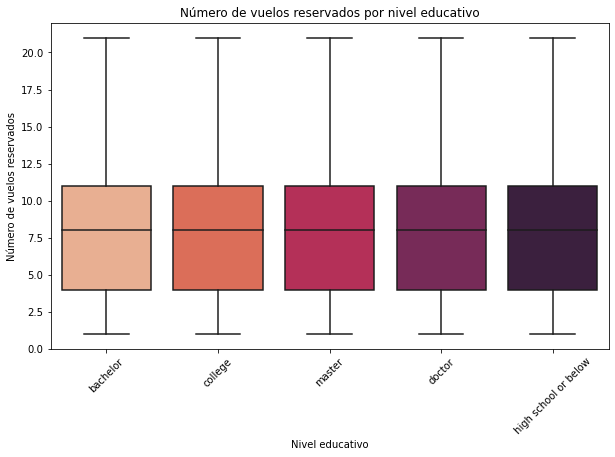

In [145]:
# Crear un boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x="education",
            y="flights_booked", 
            data=df_flights_education_book,
            palette="rocket_r")


# Titulo, ejes y rotación nombre ejes
plt.title("Número de vuelos reservados por nivel educativo")
plt.xlabel("Nivel educativo")
plt.ylabel("Número de vuelos reservados")
plt.xticks(rotation=45)
plt.show()

### Comparación entre datos de todos los clientes (tanto los que sí han reservado y los que no han reservado vuelos) y estudio de los datos de los clientes que sí han reservado vuelos.

- Todos los clientes(con y sin reserva de vuelos -> 48.85%): baja media y mediana del número de vuelos reservados, la moda es 0, la varianza(indica como de dispersos están los datos respecto a la media) es mayor en este conjunto de datos.

   En la gráfica boxplot (en la cual podemos observar la mediana, los cuartiles, los bigotes y los valores atípicos) podemos observar que se identifican valores atípicos.

- Clientes que si han reservado vuelos: la media, mediana y varianza son mayores que ne le otro caso, y la moda no es 0, si no que es 3.

   En la gráfica boxplot podemos ver que no hay valores atípicos



En esta primera exploración estadística, podemos observar que no hay una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos.



**Prueba Estadística**

In [182]:
# Función para agrupar los niveles educativos
def group_education(education_level):
    if education_level in ["bachelor", "doctor", "master"]:
        return "superior"
    else:
        return "basic"

In [183]:
df_flights_education["education_group"] = df_flights_education["education"].apply(group_education)

In [184]:
df_flights_education.sample(10)

,flights_booked,education,education_group
338136,13,bachelor,superior
329736,11,bachelor,superior
295918,11,bachelor,superior
314905,0,bachelor,superior
323798,8,bachelor,superior
7723,3,bachelor,superior
206290,5,college,basic
231953,13,bachelor,superior
384767,0,bachelor,superior
190667,0,bachelor,superior


In [185]:
print(f"El número de filas de  es {df_flights_education.shape[0]}, y el número de columnas es {df_flights_education.shape[1]}")

El número de filas de  es 403760, y el número de columnas es 3


In [187]:
df_flights_education.columns

Index(['flights_booked', 'education', 'education_group'], dtype='object')

In [188]:
describe_education = df_flights_education.groupby("education_group")["flights_booked"].describe().T

describe_education

education_group,basic,superior
count,121175.000000,282585.000000
mean,4.170753,4.118311
std,5.244962,5.223592
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,1.000000
75%,8.000000,8.000000
max,21.000000,21.000000


- Promedio: el promedio, independientemente del nivel educativo, es de 4 vuelos.

- Mínimo: El mínimo en los dos niveles educativos es de 0 vuelos

- Máximo: el máximo de vuelos reservados es de 21, independientemente del nivel educativo.

- Desviación: la desviación es similar en los dos grupos.

### Hipótesis

- H0 (Hipótesis Nula): no hay una diferencia significativa entre la reserva de vuelos y los grupos educativos.

- H1 (Hipótesis Alernativa): hay una diferencia significativa entre la reserva de vuelos y los grupos educativos.

- Grupo Control: Educación superior -> Superior.

- Grupo Test: Educación básica -> Basic.

In [189]:
# Filtramos para selecionar basico y superior
basic_group = df_flights_education[df_flights_education['education_group'] == 'basic']['flights_booked']
superior_group = df_flights_education[df_flights_education['education_group'] == 'superior']['flights_booked']

In [190]:
## Shapiro-Wilk 
shapiro_basic_group = stats.shapiro(basic_group)
shapiro_superior_group = stats.shapiro(superior_group)

# Imprimimos los resultados del test de Shapiro-Wilk
print(f"Test de Shapiro-Wilk para el grupo básico: Estadístico = {shapiro_basic_group.statistic}, p-valor = {shapiro_basic_group.pvalue}")
print(f"Test de Shapiro-Wilk para el grupo superior: Estadístico = {shapiro_superior_group.statistic}, p-valor = {shapiro_superior_group.pvalue}")

# Interpretación de los resultados
if shapiro_basic_group.pvalue > 0.05:
    print("El grupo básico sigue una distribución normal.")
else:
    print("El grupo básico no sigue una distribución normal.")

if shapiro_superior_group.pvalue > 0.05:
    print("El grupo superior sigue una distribución normal.")
else:
    print("El grupo superior no sigue una distribución normal.")

Test de Shapiro-Wilk para el grupo básico: Estadístico = 0.7910997271537781, p-valor = 0.0
Test de Shapiro-Wilk para el grupo superior: Estadístico = 0.7877584099769592, p-valor = 0.0
El grupo básico no sigue una distribución normal.
El grupo superior no sigue una distribución normal.


Realizamos un test de Shapiro-Wilk para saber si los grupos, básico y superior, siguen una distribución normal, por el p-valor podemos concluir que no siguen una distribución normal.

In [191]:
# Prueba de Levene para homogeneidad de varianzas
levene_test = stats.levene(basic_group, superior_group)

print("\nPrueba de Levene para homogeneidad de varianzas:")
print(f'Estadístico: {levene_test.statistic}, p-valor: {levene_test.pvalue}')

# Interpretación de los resultados
alpha = 0.05
if levene_test.pvalue > alpha:
    print("No se rechaza la homogeneidad de varianzas (p > 0.05).")
else:
    print("Se rechaza la homogeneidad de varianzas (p <= 0.05).")


Prueba de Levene para homogeneidad de varianzas:
Estadístico: 7.931372699306991, p-valor: 0.0048587279888045185
Se rechaza la homogeneidad de varianzas (p <= 0.05).


Para la homogeneidad de las varianzas realizamos la prueba de Levene, puesto que el p-valor < 0.05 podemos concluir que no siguen una homogeneidad.

Como no siguen una distribución normal y no hay homogeneidad de las varianzas realizamos la prueba de Mann-Whitney.

La prueba de Mann-Whitney es buena frente a la falta de normalidad y a las diferencias en la varianza, lo que la hace adecuada para esta situación. La prueba de Mann-Whitney U es apropiada para comparar directamente dos grupos sin asumir una distribución específica.

In [192]:
# Prueba de Mann-Whitney 
mannwhitney_result = stats.mannwhitneyu(basic_group, superior_group)

print("Prueba de Mann-Whitney:")
print(f'Estadístico U: {mannwhitney_result.statistic}, p-valor: {mannwhitney_result.pvalue}')

# Interpretación de los resultados
alpha = 0.05
if mannwhitney_result.pvalue > alpha:
    print("No hay una diferencia significativa entre los grupos (p > 0.05).")
else:
    print("Hay una diferencia significativa entre los grupos (p <= 0.05).")

Prueba de Mann-Whitney:
Estadístico U: 17216065553.0, p-valor: 0.002942081262120518
Hay una diferencia significativa entre los grupos (p <= 0.05).


Tras realizar la prueba de Mann-Whitney, tenemos un p-valor < 0.05, por lo que rechazamos la hipótesis nula, sí hay una diferencia significativa para le número de reservas de vuelos entre los niveles educativos. 